In [1]:
using Optim
using Statistics

In [3]:
using Plots
ezcontour(x, y, f) = begin
    X = repeat(x', length(y), 1)
    Y = repeat(y, 1, length(x))
    # Evaluate each f(x, y)
    Z = map((x,y) -> log(f([x,y])), X, Y)
    plot(x, y, Z, st=:contour)
end

ezcontour (generic function with 1 method)

In [4]:
f = x -> (x[1].^2 + x[2] - 11).^2 + (x[1] + x[2].^2 - 7).^2
sol = optimize(f, [0.0;0.0], NelderMead())
xs = sol.minimizer

2-element Vector{Float64}:
 2.999997967010201
 2.000014239464575

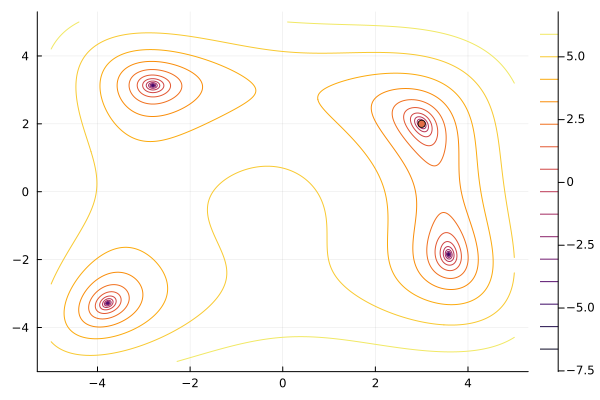

In [5]:
ezcontour(-5:0.02:5, -5:0.02:5, z -> f(z)[1])
scatter!([xs[1]],[xs[2]],label=false)

In [6]:
""" Take one step of the Nelder-Mead method to optimize a 
continuous function with no derivatives.

    `nelder_mead_step!(f,X) -> X,type`

This modifies X
"""
function nelder_mead_step!(f,X)
    # just do the simplest thing that could be dramatically improved
    npts = size(X,2) # number of points
    n = size(X,1)    # dim
    @assert(npts == n+1) # need a simplex
    fs = zeros(npts)
    for i in 1:npts # compute all function vals
        fs[i] = f(vec(X[:,i]))
    end
    
    p = sortperm(fs) # sort in increasing order
    
    Xmid = @view X[:,p[1:end-1]]
    xworst = @view X[:,p[end]]
    centroid = vec(mean(Xmid,dims=2))
    
    xbar = alpha -> centroid + alpha*(xworst - centroid)
    
    fm1 = f(xbar(-1)) # unit step away from centroid
    step = 0.0
    if fs[p[1]] <= fm1 && fm1 <= fs[p[end-1]]
        # accept
        xworst[:] = xbar(-1)
        step = -1.0
        return X,step
    elseif fm1 < fs[p[1]] # we found a much better point 
        # try and improve
        fm2 = f(xbar(-2))
        if fm2 < fm1
            # we made things better, accept!
            xworst[:] = xbar(-2)
            step = -2.0
            return X,step
        else
            xworst[:] = xbar(-1)
            step = -1.0
            return X,step
        end
    else
        # fm1 > second worst point
        if fs[p[end-1]] <= fm1 && fm1 <= fs[p[end]]
            fmhalf = f(xbar(-1/2))
            if fmhalf <= fm1
                xworst[:] = xbar(-1/2)
                step = -1/2
                return X,step
            end
        else
            fhalf = f(xbar(1/2))
            if fhalf < fs[p[end]] # we got slighlty better
                xworst[:] = xbar(1/2)
                step = 1/2
                return X,step
            end
        end
    end
       
    @assert(step == 0.0)
    # shrink towards best point
    xbest = @view X[:,p[1]]
    for i=1:npts
        if i != p[1]
            X[:,i] = 1/2*(X[:,i] + xbest)
        end
    end
    return X,step
end

nelder_mead_step!

In [6]:
X = 2.5*randn(2,3)
nelder_mead_step!(f,X)

([3.53646 2.01077 3.62906; -2.10995 -0.487062 -1.02088], -1.0)

In [7]:
using Interact
using Printf

In [8]:
nstart = 10
X0s = collect(map( x -> 2.5*randn(2,3), 1:nstart )) # generate 10 sets of starts
@manipulate for start=1:nstart, nstep=0:20
        ezcontour(-5:0.02:5, -5:0.02:5, z -> f(z)[1])
    X = copy(X0s[start])
    for j=1:nstep
        nelder_mead_step!(f, X)
        plot!(Shape([ (X[1,i], X[2,i]) for i in 1:size(X,2) ]), 
            fillalpha=0.2, fillcolor="grey")
    end
    
    plot!(Shape([ (X[1,i], X[2,i]) for i in 1:size(X,2) ]))
    title!(@sprintf("start = %i, step = %i", start, nstep))
    plot!(legend=false)
end
    

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:start=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
5), Observable{Int64} with 2 listeners. Value:
5, Scope("knockout-component-cc29f799-7ee3-4735-97e4-ab9c59da4986", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["start"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>10,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Any["knockout"=>"/homes/liu1740/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/homes/liu1740/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/homes/liu1740/.julia/packages/InteractBase/3SqBl/src/../assets/all.js", "/homes/liu1740/.julia/packages/InteractBase/3SqBl/src/../assets/style.css", "/homes/liu1740/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":5}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-cc29f799-7ee3-4735-97e4-ab9c59da4986\",\"id\":\"ob_12\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-cc29f799-7ee3-4735-97e4-ab9c59da4986\",\"id\":\"ob_11\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n    sel

In [ ]:
X0